In [1]:
import pyppeteer
import requests
from pyppeteer import launch

In [2]:
from PIL import Image
from io import StringIO,BytesIO

In [3]:
def drawPng (png):
    return Image.open(BytesIO(png))

In [4]:
async def draw (p):
    return drawPng(await p.screenshot())

In [5]:
# Pyppeteer 支持字典 和 关键字传参，Puppeteer 只支持字典传参。
# 这里使用字典传参
browser = await launch(
    {
        'headless': False,#True, 
        'dumpio': True, 
        'autoClose': False, 
        'args': [
            '--no-sandbox', 
            '--window-size=1366,850'
        ]
    }
)
page = await browser.newPage()
await page.setViewport({'width': 1366, 'height': 768})

In [7]:
%%time
a = requests.get('http://apps.webofknowledge.com/')

Wall time: 48.2 s


In [7]:
url = a.url.replace('UA','WOS').replace('&preferencesSaved=', '').replace('GeneralSearch', 'AdvancedSearch')

In [6]:
await page.goto('http://apps.webofknowledge.com/')

In [8]:
await page.goto(url)#/WOS_GeneralSearch_input.do?product=WOS&SID=7D9lvfMRIdH4eAZ8TGX&search_mode=GeneralSearch')

In [150]:
#await page.evaluate('Object.defineProperties(navigator,{webdriver:{ get: () => undefined}})')

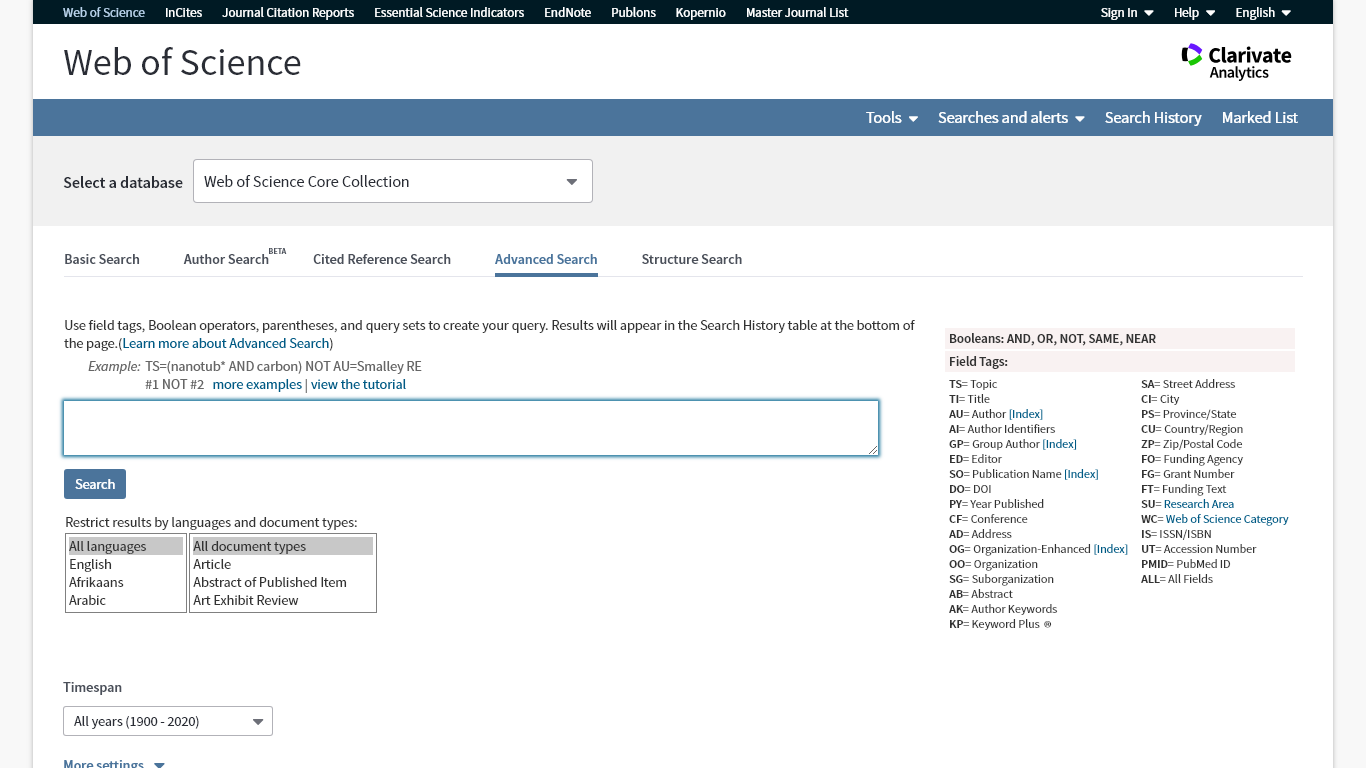

In [9]:
await draw(page)

In [16]:
keyWord = 'TS=covid-19'

In [17]:
typeKw = "document.getElementsByName('value(input1)')[0].value='%s'" % keyWord

In [12]:
search = '''document.querySelectorAll('[class="standard-button primary-button"]')[1].click()'''

In [13]:
gotoSearch = "document.getElementById('hitCount').click()"

In [26]:
scrollDown = "window.scrollBy(0,300)"

In [18]:
await page.evaluate(typeKw)

'TS=covid-19'

In [19]:
await page.evaluate(search)

In [27]:
await page.evaluate(scrollDown)
await draw(page)

NetworkError: Execution context was destroyed, most likely because of a navigation.

In [28]:
await page.evaluate('navigator.userAgent')

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/71.0.3542.0 Safari/537.36'

In [153]:
ipt = (await page.Jx("//input[@name='value(input1)']"))[0]

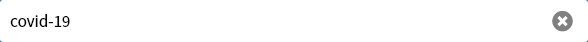

In [154]:
await draw(ipt)

In [155]:
await page.evaluate("document.getElementsByName('value(input1)')[0].value='%s'" % keyWord)

'covid-19'

In [158]:
await page.evaluate("JQcheck_form_inputs('WOS_GeneralSearch_input_form','search')")

True

In [130]:
await (await page.Jx("//*[@alt='Search']"))[0].click()

In [57]:
await page.goBack()

In [136]:
await page.goto('https://www.cnblogs.com/come202011/p/12500323.html')

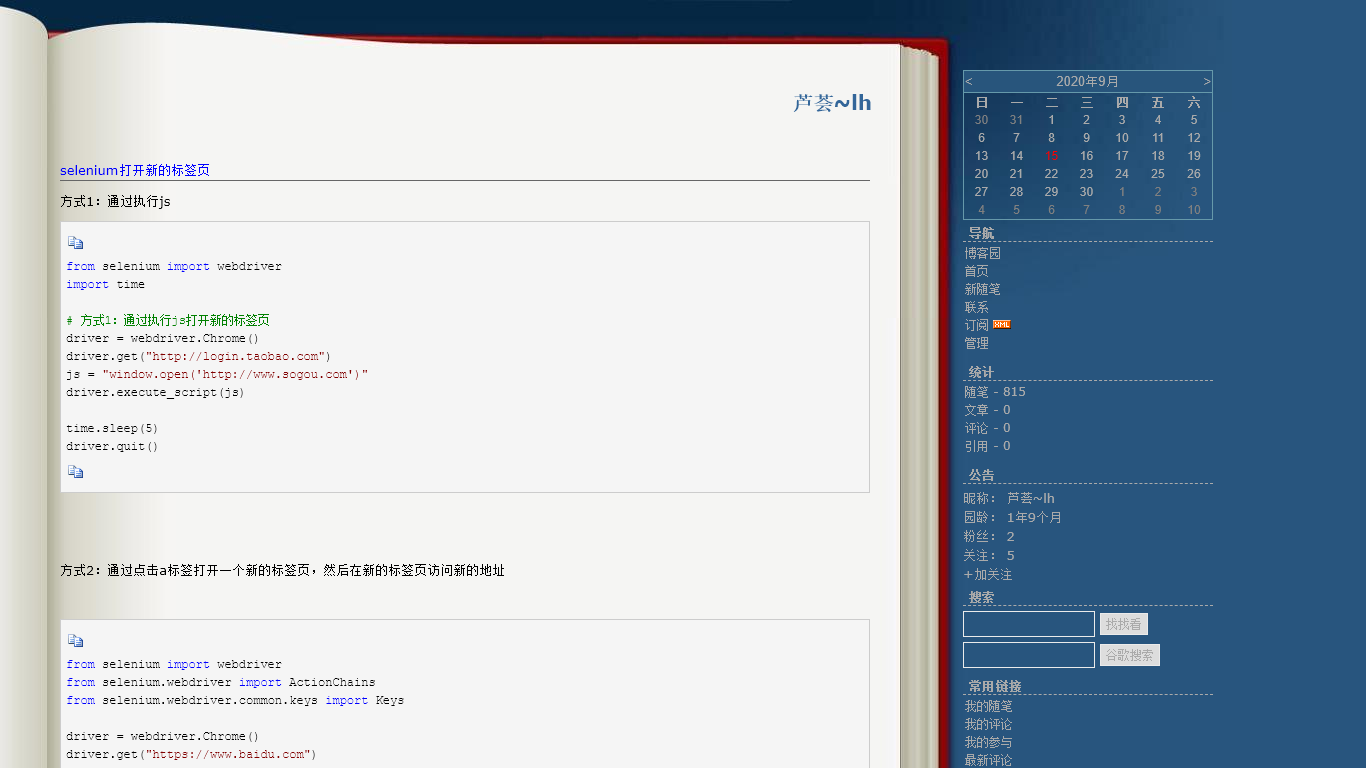

In [137]:
await draw(page)

In [ ]:
await page.evaluate(JQcheck_form_inputs('WOS_GeneralSearch_input_form','search'))

In [ ]:
page = await browser.newPage()
    await page.goto('http://quotes.toscrape.com/js/')
    await page.screenshot(path='example.png')
    await page.pdf(path='example.pdf')
    dimensions = await page.evaluate('''() => {
        return {
            width: document.documentElement.clientWidth,
            height: document.documentElement.clientHeight,
            deviceScaleFactor: window.devicePixelRatio,
        }
    }''')

In [141]:
r = requests.get('http://apps.webofknowledge.com/Search.do?product=WOS&SID=7D9lvfMRIdH4eAZ8TGX&search_mode=GeneralSearch&prID=8e7f10cb-d9f2-4eac-aad0-d25a219cd8f3')

In [143]:
r.text

'<!DOCTYPE html>                                                                                                                                                                                                                      <html lang="en">                                                                                                                             <head>  <script> (function(siteId){  (function(h,o,t,j,a,r){ h.hj=h.hj||function(){(h.hj.q=h.hj.q||[]).push(arguments)}; h._hjSettings={hjid:siteId,hjsv:6}; a=o.getElementsByTagName(\'head\')[0]; r=o.createElement(\'script\');r.async=1; r.src=t+h._hjSettings.hjid+j+h._hjSettings.hjsv; a.appendChild(r); })(window,document,\'https://static.hotjar.com/c/hotjar-\',\'.js?sv=\'); })("1496794");  </script><link rel="icon" href="http://images.webofknowledge.com//WOKRS535R95/images/wok_favicon.ico" type="image/x-icon"/> <title>Web of Science [v.5.35]  -     Web of Science Core Collection Results  </title><link rel="stylesheet" hre

In [145]:
await page.close()

PageError: Protocol Error: Connection Closed. Most likely the page has been closed.

In [144]:
await browser.close()